In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
%matplotlib inline

from scipy import stats
import sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats import diagnostic as diag
from sklearn.linear_model import LinearRegression

In [36]:
df=pd.read_csv('concrete_data.csv')

df.head()

In [38]:
df.dtypes


cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [39]:
#setting datatype of dataframe to float
df=df.astype(float)
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
age                              float64
concrete_compressive_strength    float64
dtype: object

In [40]:
df.isna().any()

cement                           False
blast_furnace_slag               False
fly_ash                          False
water                            False
superplasticizer                 False
coarse_aggregate                 False
age                              False
concrete_compressive_strength    False
dtype: bool

In [41]:
#print correlation matrix of our dataframe
corr=df.corr()
display(corr)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.003016,-0.164935
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,0.328873,1.000000


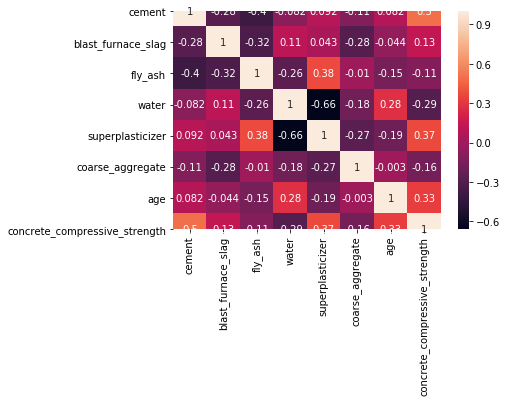

In [42]:
#plot a heat map
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

In [43]:
df_before=df
X1= df_before.drop('concrete_compressive_strength',axis=1)
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns

display(vif)

,VIF Factor,features
0,14.497611,cement
1,3.047606,blast_furnace_slag
2,3.911835,fly_ash
3,66.081624,water
4,4.087304,superplasticizer
5,56.751169,coarse_aggregate
6,1.673406,age


In [44]:
df_after= df.drop(['coarse_aggregate','water','cement'], axis=1)
X2= df_after.drop('concrete_compressive_strength',axis=1)
# For each X, calculate VIF and save in dataframe
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif1["features"] = X2.columns

display(vif1)

,VIF Factor,features
0,1.445354,blast_furnace_slag
1,1.873064,fly_ash
2,2.289546,superplasticizer
3,1.203679,age


<Figure size 1152x720 with 0 Axes>

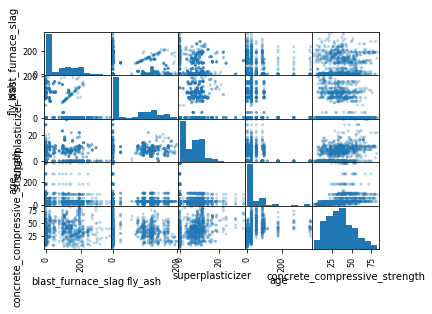

In [45]:
#plot the scatter matrix
plt.figure(figsize=(16,10))
pd.plotting.scatter_matrix(df_after,alpha=0.3)
plt.show()

In [46]:
desc_df=df.describe()

#add the standard deviation metric
desc_df.loc['+3std']=desc_df.loc['mean']+(desc_df.loc['std']*3)
desc_df.loc['-3std']=desc_df.loc['mean']-(desc_df.loc['std']*3)
desc_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,365.000000,82.600000
+3std,594.686958,332.733850,246.179362,245.629937,24.126184,1206.180794,235.171871,85.935187
-3std,-32.351229,-184.942200,-137.802663,117.504626,-11.716864,739.657070,-143.847599,-14.299265


In [81]:
X=df.drop(['concrete_compressive_strength','coarse_aggregate','water','cement'],axis=1)
Y= df[['concrete_compressive_strength']]
X

,blast_furnace_slag,fly_ash,superplasticizer,age
0,0.0,0.0,2.5,28.0
1,0.0,0.0,2.5,28.0
2,142.5,0.0,0.0,270.0
3,142.5,0.0,0.0,365.0
4,132.4,0.0,0.0,360.0
...,...,...,...,...
1025,116.0,90.3,8.9,28.0
1026,0.0,115.6,10.4,28.0
1027,139.4,108.6,6.1,28.0
1028,186.7,0.0,11.3,28.0


In [82]:
lm = sm.add_constant(X)

In [83]:
result = sm.OLS(Y,lm).fit()

In [84]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.354
Model:                                       OLS   Adj. R-squared:                  0.352
Method:                            Least Squares   F-statistic:                     140.7
Date:                           Sat, 10 Oct 2020   Prob (F-statistic):           7.33e-96
Time:                                   18:14:11   Log-Likelihood:                -4135.9
No. Observations:                           1030   AIC:                             8282.
Df Residuals:                               1025   BIC:                             8306.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 24.2536      0.900     26.951      0.000      22.488      26.020
blast_furnace_slag     0.0111      0.005      2.115      0.035       0.001       0.021
fly_ash               -0.0584      0.008     -7.636      0.000      -0.073      -0.043
superplasticizer       1.4676      0.078     18.852      0.000       1.315       1.620
age                    0.1052      0.007     15.454      0.000       0.092       0.119
==============================================================================
Omnibus:                       29.721   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.543
Skew:                           0.416   Prob(JB):                     1.41e-07
Kurtosis:                       3.208   Cond. No.                         264.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
#Run white's test
import statsmodels.stats.diagnostic as sm_diagnostic
_,pval, _, f_pval=sm_diagnostic.het_white(result.resid,result.model.exog,retres=False)
print(pval, f_pval)

4.215436038875856e-07 2.700711043551607e-07


The number of lags will be10

(array([209.21625456, 300.75824141, 355.8032665 , 410.34818988,
       508.36085167, 548.96100888, 574.60605041, 612.93296591,
       658.13556876, 724.66455046]), array([2.03637770e-047, 4.91108763e-066, 8.26157564e-077, 1.61531355e-087,
       1.25164448e-107, 2.36477050e-115, 7.14394527e-120, 3.87751481e-127,
       6.87323659e-136, 3.17772811e-149]))
The lowest p_value found was 3.178e-149
We reject null hypothesis, there no autocorrelation



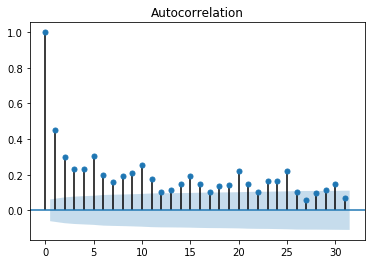

In [86]:
#Test for autocorrelation

from statsmodels.stats.stattools import durbin_watson
# calculate the lag (optional)
lag= min(10, len(X)//5)
print("The number of lags will be{}".format(lag))
print()

# run ljung Box test for no autocorrelation of residuals

test_results= diag.acorr_ljungbox(result.resid, lags=lag)
print(test_results)

# grab the p value and test statistics
ibvalue, p_val = test_results
# print the results of the test
if min(p_val)>0.05:
    print("The lowest p_value found was {:.4}".format(min(p_val)))
    print("We fail to reject null hypothesis, there is no autocorrelation")
    print()
else:
    print("The lowest p_value found was {:.4}".format(min(p_val)))
    print("We reject null hypothesis, there no autocorrelation")
    print()

# plot autocorrelation
sm.graphics.tsa.plot_acf(result.resid)
plt.show()



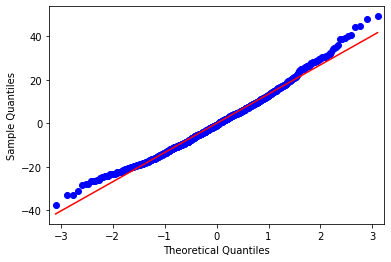

3.3188554385843124e-14

In [87]:
#Check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# check that mean of residuals is approx zero
mean_residuals= sum(result.resid)/len(result.resid)
mean_residuals

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y) 

In [89]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(772, 4)
(258, 4)
(772, 1)
(258, 1)


In [90]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
print(regression.intercept_)

[23.60994165]


In [92]:
P = pd.DataFrame(regression.coef_,index=["Co-efficient"]).transpose()
Q = pd.DataFrame(X.columns, columns=["Attributes"]) 

In [93]:
coeff_df = pd.concat([Q,P], axis=1, join= "inner")
coeff_df

,Attributes,Co-efficient
0,blast_furnace_slag,0.012185
1,fly_ash,-0.060951
2,superplasticizer,1.537619
3,age,0.104121


In [94]:
Y_pred = regression.predict(X_test)
Y_pred = pd.DataFrame(Y_pred, columns = ["Predicted Cement Compressive Strength"])
Y_pred

,Predicted Cement Compressive Strength
0,26.525331
1,26.525331
2,49.109958
3,26.525331
4,25.067636
...,...
253,27.768173
254,35.014071
255,43.964988
256,36.611330


In [95]:
Y_test

,concrete_compressive_strength
777,31.84
767,31.35
156,72.99
638,38.21
758,22.53
...,...
693,17.96
860,38.46
32,41.72
979,46.25


In [96]:
from sklearn import metrics
print("Mean Absolute Error : ", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error :  11.493385996508561
Mean Squared Error :  207.18839277974396
Root Mean Squared Error :  14.39404018265004


In [98]:
regression.predict([[0,0,0,3]]) #Actual Value was 24.4

array([[23.92230481]])

In [106]:
regression.predict([[20,94,14.3,28]]) #Actual Value was 46.68

array([[43.02759134]])